<a href="https://colab.research.google.com/github/abdulwasaeee/NUS-assignments/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import  pandas as pd
import matplotlib.pyplot   as plt
from   sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing  import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics

In [ ]:
df=pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [ ]:
x=df.drop('Outcome',axis=1)
y=df['Outcome']

In [10]:
xtrain, xtest, ytrain, ytest = train_test_split(x , y, test_size=0.2, random_state=42)


In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)

xtrain = scaler.transform(xtrain)
xtest = scaler.transform(xtest)

In [16]:
model = LogisticRegression()
model.fit(xtrain, ytrain)
model.score(xtrain,ytrain), model.score(xtest, ytest)

(0.7703583061889251, 0.7532467532467533)

In [18]:
print(confusion_matrix(ytest, model.predict(xtest)))
print(classification_report(ytest, model.predict(xtest)))

[[79 20]
 [18 37]]
              precision    recall  f1-score   support

           0       0.81      0.80      0.81        99
           1       0.65      0.67      0.66        55

    accuracy                           0.75       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.75      0.75       154



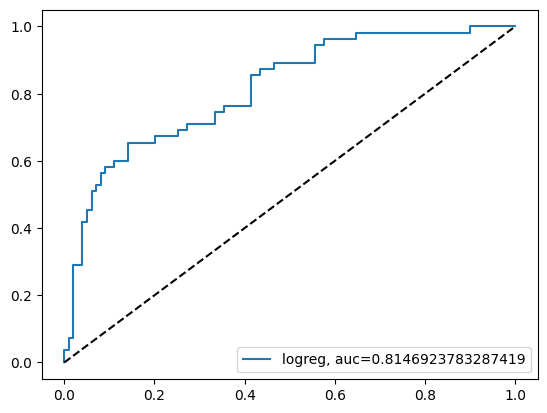

In [21]:
y_pred_proba = model.predict_proba(xtest)[::,1]
fpr, tpr, _ = metrics.roc_curve(ytest,  y_pred_proba)
auc = metrics.roc_auc_score(ytest, y_pred_proba)

plt.plot(fpr,tpr,label="logreg, auc="+str(auc))
plt.plot([0,1],[0,1],'k--')
plt.legend(loc=4)
plt.show()

In [23]:
knn = KNeighborsClassifier(5)
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)

0.8241042345276873

In [25]:
mod = GaussianNB()
mod.fit(xtrain, ytrain)
predicted = mod.predict(xtest)
mod.score(xtest,ytest)


0.7662337662337663

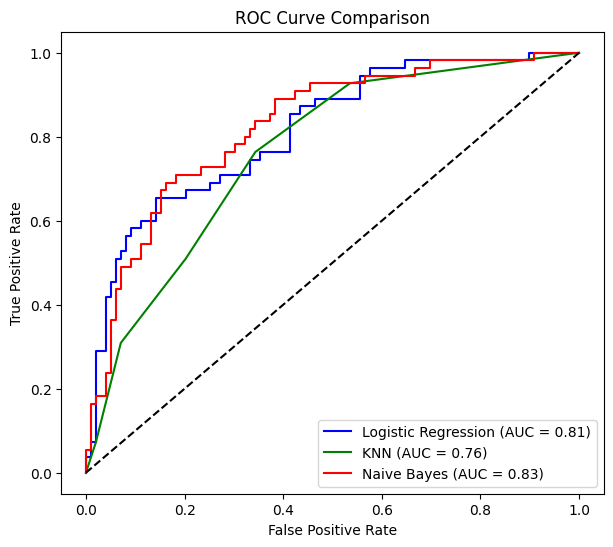

In [27]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba_log = model.predict_proba(xtest)[:, 1]
y_pred_proba_knn = knn.predict_proba(xtest)[:, 1]
y_pred_proba_nb = mod.predict_proba(xtest)[:, 1]

fpr_log, tpr_log, _ = roc_curve(ytest, y_pred_proba_log)
fpr_knn, tpr_knn, _ = roc_curve(ytest, y_pred_proba_knn)
fpr_nb, tpr_nb, _ = roc_curve(ytest, y_pred_proba_nb)

auc_log = roc_auc_score(ytest, y_pred_proba_log)
auc_knn = roc_auc_score(ytest, y_pred_proba_knn)
auc_nb = roc_auc_score(ytest, y_pred_proba_nb)

plt.figure(figsize=(7, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {auc_log:.2f})", color="blue")
plt.plot(fpr_knn, tpr_knn, label=f"KNN (AUC = {auc_knn:.2f})", color="green")
plt.plot(fpr_nb, tpr_nb, label=f"Naive Bayes (AUC = {auc_nb:.2f})", color="red")

plt.plot([0, 1], [0, 1], 'k--')  # diagonal line
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend(loc="lower right")
plt.show()